<a href="https://colab.research.google.com/github/rezkyadi/Data-Analyst-Training/blob/main/StudentProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Project 2**


**Spam Email Classification**

**Methods :**

* Logistic Regression
* k-Nearest Neighbors
* Decision Trees
* Support Vector Machines
* Naive Bayes
* Neural Network




**Preprocessing**

In [2]:
#Import Library yang akan digunakan
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report

In [3]:
#Upload Dataset from G Drive
#add dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

#baca file dataset
data_email = pd.read_csv('/content/drive/MyDrive/Training/datasets/emails.csv')

data_email.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#melihat ukuran tabel dataset (jumlah baris dan kolom)
data_email.shape

(5172, 3002)

In [5]:
#pengecekan terhadap data null pada dataset
data_email.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [6]:
#pengecekan terhadap data N/A pada dataset
data_email.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
#pengecekan data duplikat pada dataset

data_email.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5167    False
5168    False
5169    False
5170    False
5171    False
Length: 5172, dtype: bool

In [8]:
#pengecekan statistik dataset
data_email.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [9]:
#pemisahan data kord x dan y
x = data_email.drop(['Email No.', 'Prediction'], axis = 'columns')
y = data_email['Prediction']
     

In [10]:
y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#split data training dan testing
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 0)
trainX.shape, testX.shape, trainY.shape, testY.shape

((4137, 3000), (1035, 3000), (4137,), (1035,))

**Logistic Regression**

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
#Logistic Regression

logs = LogisticRegression(max_iter=500000)
print(logs.get_params())

# Train model
logs.fit(trainX, trainY)
print(f"Model weights: {logs.coef_}, bias: {logs.intercept_}")

# prediction test
y_prediction = logs.predict(testX)
     

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Model weights: [[-0.41302144 -0.15735311  0.05020406 ... -0.08491843 -0.09756888
  -0.04151026]], bias: [1.59194682]


In [15]:
from sklearn import metrics

[[726  24]
 [ 10 275]]


Text(0.5, 427.9555555555555, 'Predicted label')

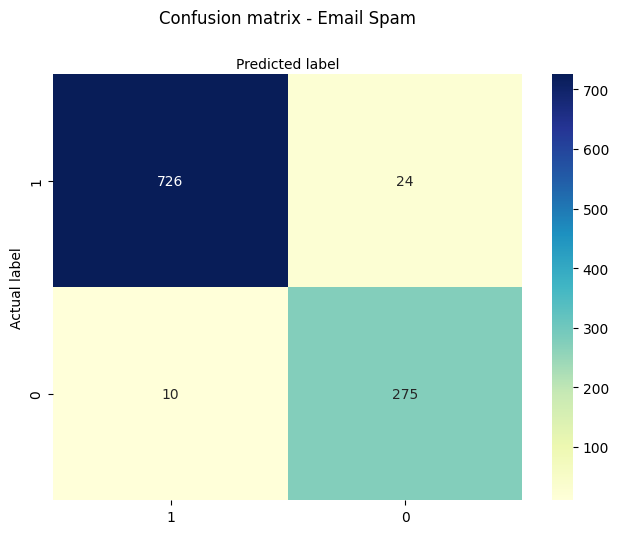

In [17]:
# confusion matrix

confs_matrix = metrics.confusion_matrix(testY, y_prediction)
print(confs_matrix)

class_names=['1','0'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(confs_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
# accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(testY, y_prediction))
print("Precision:", metrics.precision_score(testY, y_prediction))
print("Recall:", metrics.recall_score(testY, y_prediction))

Accuracy: 0.9671497584541063
Precision: 0.919732441471572
Recall: 0.9649122807017544


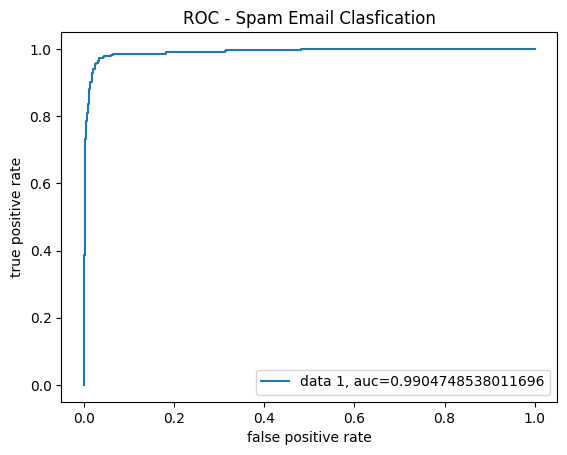

In [21]:
y_prediction_proba = logs.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_prediction_proba)
auc = metrics.roc_auc_score(testY, y_prediction_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Spam Email Clasfication')
plt.legend(loc=4)
plt.show()

**KNN**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# buat classifier untuk Nearest Neighbors
n_neighbors = 22
clsf = KNeighborsClassifier(n_neighbors, weights='uniform')
print(logs.get_params())

# Train model
clsf.fit(trainX, trainY)

# test
y_prediction_knn = logs.predict(testX)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 22, 'p': 2, 'weights': 'uniform'}


In [31]:
from sklearn.neighbors import KNeighborsClassifier
# buat classifier untuk Nearest Neighbors
KNN_model = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
print(KNN_model.get_params())

# Train model
KNN_model.fit(trainX, trainY)

# test
y_prediction_knn = KNN_model.predict(testX)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}


[[670  80]
 [ 70 215]]


Text(0.5, 427.9555555555555, 'Predicted label')

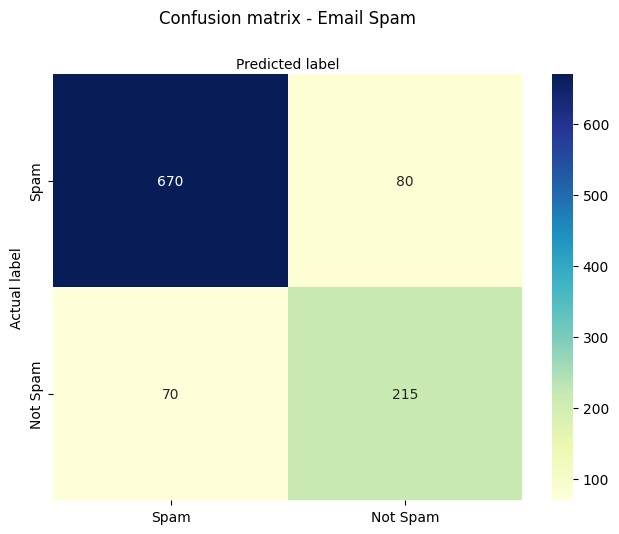

In [32]:
#Confussion Matrix

knn_matrix = metrics.confusion_matrix(testY, y_prediction_knn)
print(knn_matrix)

class_names=['Spam','Not Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(knn_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_prediction_knn))
print("Precision:", metrics.precision_score(testY, y_prediction_knn))
print("Recall:", metrics.recall_score(testY, y_prediction_knn))
print("F1-Score:", metrics.f1_score(testY, y_prediction_knn))

Accuracy: 0.855072463768116
Precision: 0.7288135593220338
Recall: 0.7543859649122807
F1-Score: 0.7413793103448276


**Decision Tree**

In [33]:

from sklearn.tree import DecisionTreeClassifier

# buat classifier untuk DecisionTreeClassifier
dt_clsf = DecisionTreeClassifier()
print(dt_clsf.get_params())

# Train model
dt_clsf.fit(trainX, trainY)

# test
y_prediction_dt = dt_clsf.predict(testX)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


[[726  24]
 [ 10 275]]


Text(0.5, 427.9555555555555, 'Predicted label')

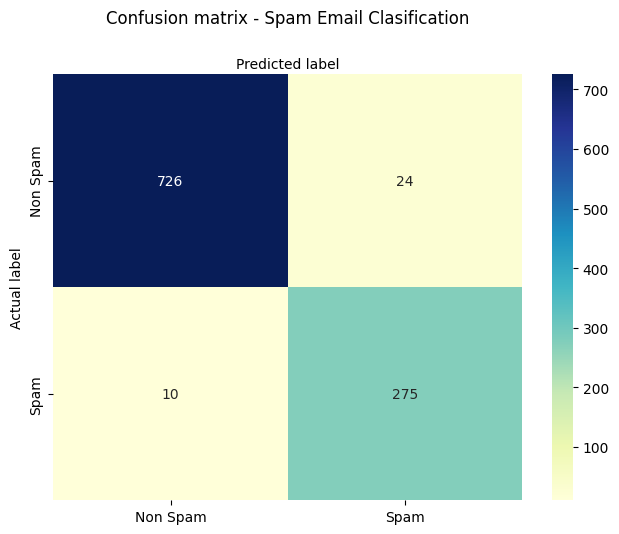

In [36]:
dt_confs_matrix = metrics.confusion_matrix(testY, y_prediction)
print(dt_confs_matrix)

class_names=['Non Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(confs_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Spam Email Clasification', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_prediction_dt))
print("Precision:", metrics.precision_score(testY, y_prediction_dt))
print("Recall:", metrics.recall_score(testY, y_prediction_dt))
print("F1-Score:", metrics.f1_score(testY, y_prediction_dt))

Accuracy: 0.9352657004830918
Precision: 0.8657718120805369
Recall: 0.9052631578947369
F1-Score: 0.8850771869639795


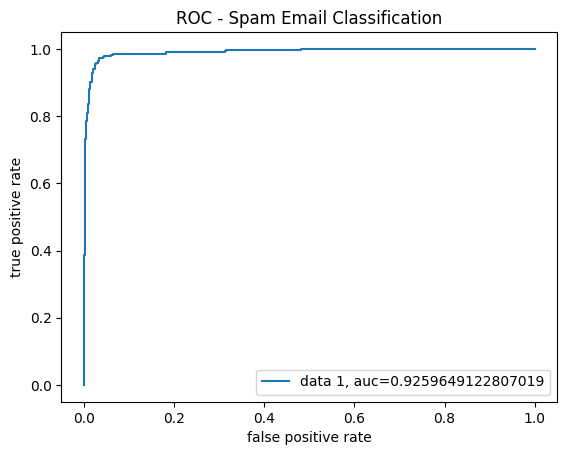

In [38]:
y_prediction_dt = dt_clsf.predict_proba(testX)[::,1]
fpr_dt, tpr_dt, _dt = metrics.roc_curve(testY,  y_prediction_proba)
auc_dt = metrics.roc_auc_score(testY, y_prediction_dt)

plt.plot(fpr_dt,tpr_dt,label="data 1, auc="+str(auc_dt))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Spam Email Classification')
plt.legend(loc=4)
plt.show()

**Support Vector Machines**

In [45]:
from sklearn.svm import SVC
# buat classifier untuk SVC
svm_clsf = SVC(probability=True)
print(svm_clsf.get_params())

# Train model
svm_clsf.fit(trainX, trainY)

# test
y_prediction_svm = svm_clsf.predict(testX)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


[[672  78]
 [ 73 212]]


Text(0.5, 427.9555555555555, 'Predicted label')

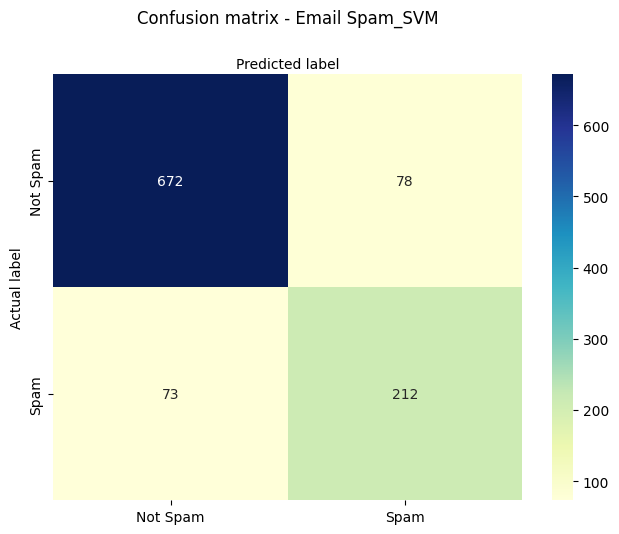

In [46]:
# confusion_matrix
from sklearn import metrics

svm_cnfs_matrix = metrics.confusion_matrix(testY, y_prediction_svm)
print(cnfs_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnfs_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam_SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_prediction_svm))
print("Precision:", metrics.precision_score(testY, y_prediction_svm))
print("Recall:", metrics.recall_score(testY, y_prediction_svm))
print("F1-Score:", metrics.f1_score(testY, y_prediction_svm))

Accuracy: 0.7951690821256039
Precision: 0.8067226890756303
Recall: 0.3368421052631579
F1-Score: 0.4752475247524753


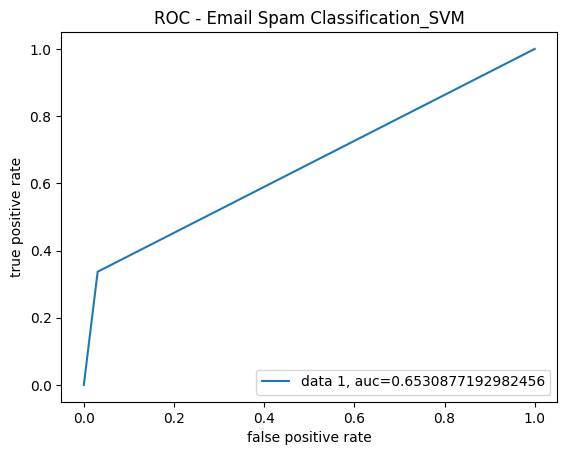

In [48]:
# ROC
y_prediction_proba = clsf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_prediction_svm)
auc = metrics.roc_auc_score(testY, y_prediction_svm)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_SVM')
plt.legend(loc=4)
plt.show()

**Naive Bayes**

In [53]:
from sklearn.naive_bayes import GaussianNB

In [55]:
# buat classifier untuk naive bayes
NV_clsf = GaussianNB()
print(NV_clsf.get_params())

# Train model
NV_clsf.fit(trainX, trainY)

# test
y_prediction_NV = NV_clsf.predict(testX)

{'priors': None, 'var_smoothing': 1e-09}


[[714  36]
 [  7 278]]


Text(0.5, 427.9555555555555, 'Predicted label')

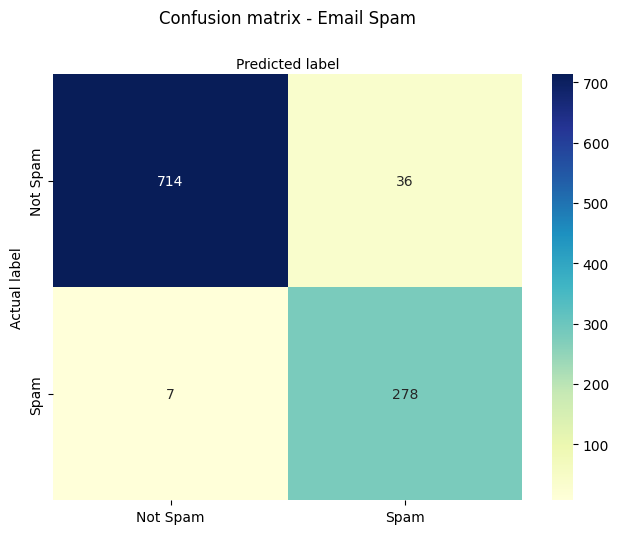

In [57]:
# confusion_matrix
from sklearn import metrics


NV_cnfs_matrix = metrics.confusion_matrix(testY, y_prediction_NV)
print(NV_cnfs_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(NV_cnfs_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_prediction_NV))
print("Precision:", metrics.precision_score(testY,y_prediction_NV))
print("Recall:", metrics.recall_score(testY, y_prediction_NV))
print("F1-Score:", metrics.f1_score(testY, y_prediction_NV))

Accuracy: 0.9584541062801932
Precision: 0.8853503184713376
Recall: 0.9754385964912281
F1-Score: 0.9282136894824708


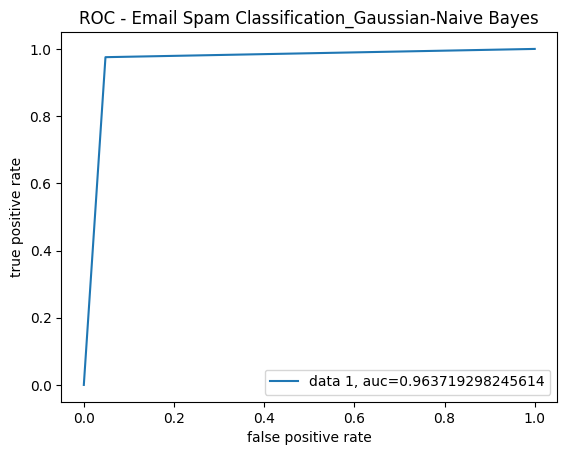

In [60]:
# ROC
y_prediction_proba = clsf.predict_proba(testX)[::,1]
fpr_NV, tpr_NV, _ = metrics.roc_curve(testY, y_prediction_NV)
auc = metrics.roc_auc_score(testY, y_prediction_NV)

plt.plot(fpr_NV,tpr_NV,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_Gaussian-Naive Bayes')
plt.legend(loc=4)
plt.show()

**Neural Networks**

In [61]:
from sklearn.neural_network import MLPClassifier

mlp_clsf = MLPClassifier(hidden_layer_sizes=(5,2), max_iter = 300,activation = 'relu',solver = 'adam')

In [62]:
print(mlp_clsf.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [63]:
mlp_clsf.fit(trainX, trainY)

# test
y_prediction_nn = mlp_clsf.predict(testX)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
mlp_clsf.fit(trainX, trainY)

# test
y_prediction_nn = mlp_clsf.predict(testX)

[[750   0]
 [285   0]]


Text(0.5, 427.9555555555555, 'Predicted label')

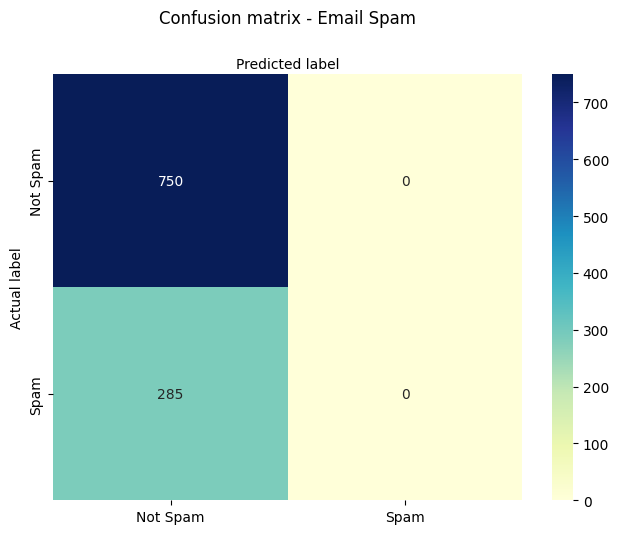

In [65]:
mlp_cnfs_matrix = metrics.confusion_matrix(testY, y_prediction_nn)
print(mlp_cnfs_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(mlp_cnfs_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [66]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_prediction_nn))
print("Precision:", metrics.precision_score(testY, y_prediction_nn))
print("Recall:", metrics.recall_score(testY, y_prediction_nn))
print("F1-Score:", metrics.f1_score(testY, y_prediction_nn))

Accuracy: 0.7246376811594203
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


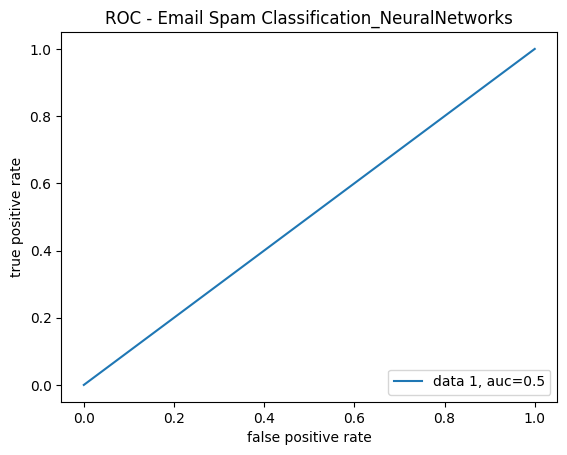

In [67]:
# ROC
y_prediction_proba = clsf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_prediction_nn)
auc = metrics.roc_auc_score(testY, y_prediction_nn)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_NeuralNetworks')
plt.legend(loc=4)
plt.show()